<a href="https://colab.research.google.com/github/ShantanuDhadwe/FMML_Project_and_Labs/blob/main/MODULE_3_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

**EUCLIDEAN DISTANCE**

In [166]:
x_1= np.array((3,4))
x_2 = np.array((5,6))

In [167]:
#TASK_1
#using numpy
euclidean_distance=np.sqrt(np.sum((x_1-x_2)**2))
print(euclidean_distance)

2.8284271247461903


In [168]:
#using scipy
euclidean_distance = distance.euclidean(x_1,x_2)
print(euclidean_distance)

2.8284271247461903


In [169]:
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [170]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [171]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin',
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

**MANHATTAN DISTANCE**

In [172]:
#USING SCIPY
manhattan_dist = distance.cityblock(x_1, x_2)
print(manhattan_dist)

4


In [173]:
#TASK 2
#USING NUMPY
manhattan_dist = np.sum(np.abs(x_1 - x_2))
print(manhattan_dist)

4


In [174]:
plotx = np.linspace(-10,10,50)
meshx,meshy = np.meshgrid(plotx,plotx)

In [175]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [176]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=tempmanhattan,x=plotx,y=plotx)])
fig.update_layout(title = "Manhattan distance from origin",
                  width = 1000, height=1000,
                  margin = dict(l=65, r=65, b=65, t=65))
fig.show()

**MINKOWSKI DISTANCE**

In [177]:
#using scipy
minkowski_distance = distance.minkowski(x_1, x_2, p=3)
print("Minkowski distance when p=3 is ",minkowski_distance)

Minkowski distance when p=3 is  2.5198420997897464


In [178]:
minkowski_dist_p1 = distance.minkowski(x_1,x_2,p=1)
print("Minkowski distance when p=1 is ",minkowski_dist_p1)#manhattan
minkowski_dist_p2 = distance.minkowski(x_1,x_2,p=2)
print("Minkowski distance when p=2 is ",minkowski_dist_p2)#eucledean

Minkowski distance when p=1 is  4.0
Minkowski distance when p=2 is  2.8284271247461903


**HAMMING DISTANCE**

In [179]:
str_1 = 'euclidean'
str_2 = 'manhattan'
hamming_dist = distance.hamming(list(str_1), list(str_2)) * len(str_1)
print(hamming_dist)



7.0


**COSINE DISTANCE**

In [180]:
from numpy.linalg import norm
#using scipy
cosine_similarity = 1 - distance.cosine(x_1,x_2)
print(cosine_similarity)
#using numpy
cosine_similarity = np.dot(x_1, x_2)/(norm(x_1)*norm(x_2))
print(cosine_similarity)

0.9986876634765887
0.9986876634765887


**CHEBYSHEV DISTANCE**

In [181]:
chebyshev_distance = distance.chebyshev(x_1,x_2)
print(chebyshev_distance)

2


**JACCARD DISTANCE**

In [182]:
print(distance.jaccard(list(str_1), list(str_2)))
print(list(str_1))
print(list(str_2))

7.0
['e', 'u', 'c', 'l', 'i', 'd', 'e', 'a', 'n']
['m', 'a', 'n', 'h', 'a', 't', 't', 'a', 'n']


/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:806: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [183]:
print(distance.jaccard([1, 0, 0], [0, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 1]))

1.0
0.5
0.6666666666666666


In [184]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

list1 = ['dog', 'cat', 'rat']
list2 = ['dog', 'cat', 'mouse', 'rabbit']
# The intersection is ['dog', 'cat']
# union is ['dog', 'cat', 'rat', 'mouse, 'rabbit']
words1 = set(list1)
words2 = set(list2)
print("Jaccard similarity is :",jaccard_similarity(words1, words2))
print("Jaccard distance is :", 1-jaccard_similarity(words1, words2))

Jaccard similarity is : 0.4
Jaccard distance is : 0.6


**SECTION 2.1**

In [185]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

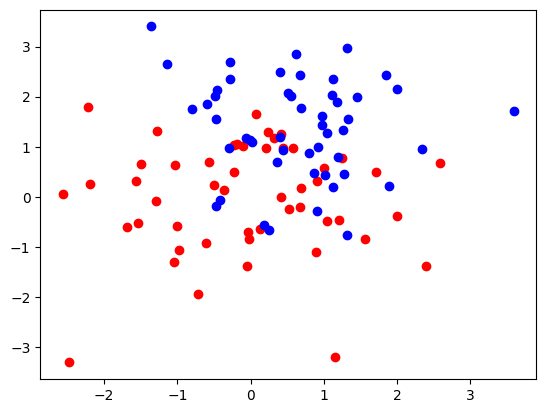

In [186]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

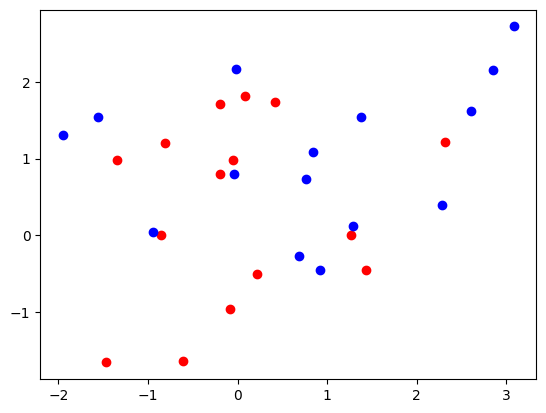

In [187]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [188]:
## TASK - 3
## The code given below is that of a KNN classifier, provided by Scikit-learn.
## The parameter 'metric' includes various distance metric options, including those
## we learnt above- manhattan, euclidean, minkowski,chebyshev, hamming, etc.

## Try out different metrics and observe changes in the accuracy, if any. Don't change value of 'k'
## Also, experiment with different metrics and observe if they are applicable for this kind of data.
## If there are any additional parameters needed, for instance, 'p' in case of Minkowski distance, include them.
distance_metrics = {'euclidean','manhattan','minkowski','chebyshev','hamming','cosine','jaccard'}
for METRIC in distance_metrics:
  knn = KNeighborsClassifier(n_neighbors = 3,metric = METRIC)
  knn.fit(pts, tgts)
  our_predictions = knn.predict(test_pts)
  print("Prediction Accuracy of",METRIC,": ")
  print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy of jaccard : 
50.0
Prediction Accuracy of cosine : 
50.0
Prediction Accuracy of hamming : 
50.0
Prediction Accuracy of manhattan : 
53.333333333333336
Prediction Accuracy of euclidean : 
56.666666666666664
Prediction Accuracy of chebyshev : 
56.666666666666664
Prediction Accuracy of minkowski : 
56.666666666666664


**SECTION:2.2**

In [189]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [190]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [191]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

In [192]:
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

In [197]:
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

In [194]:
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [198]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0

